In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
import pandas as pd
df =pd.read_csv("C:/Users/User/OneDrive/Desktop/jupyter notebook/insurance.csv.csv")

In [5]:
print(df.head())
print(df.info())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [6]:
%matplotlib inline
sns.set(style='whitegrid')

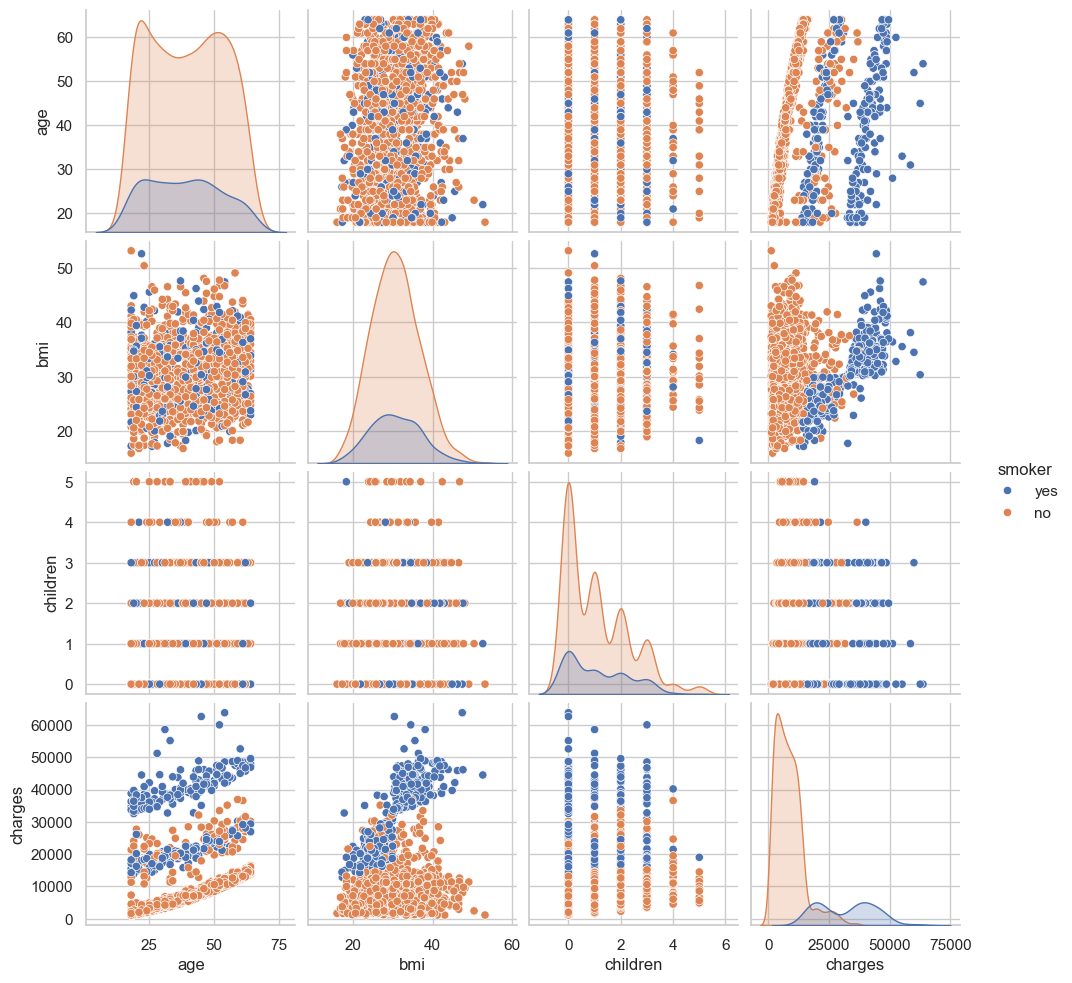

In [7]:
sns.pairplot(df,hue='smoker')
plt.show()

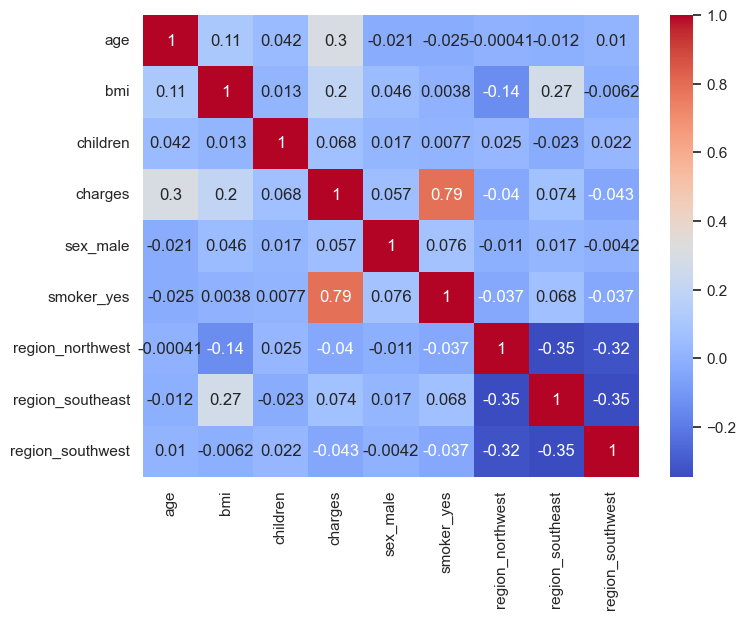

In [8]:
df =pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [9]:
x=df.drop('charges',axis=1)
y=df['charges']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred=rf.predict(x_test)
print(" base line value R^2:",r2_score(y_test,y_pred))
print("Mean absolute erro: ",mean_absolute_error(y_test,y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

 base line value R^2: 0.8520852453249403
Mean absolute erro:  2667.1494970211447
RMSE : 4657.026790942916


In [12]:
cv_scores= cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(" mean cv R2:",np.mean(cv_scores))

 mean cv R2: 0.8128580022078994


In [13]:
param_grid={'n_estimators':[100,200,300],'max_depth':[None,5,10],'min_samples_split':[2,5,10]}
grid_rf=GridSearchCV(rf,param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1)
grid_rf.fit(x_train,y_train)
best_rf=grid_rf.best_estimator_
print("best  hyper parameters :",grid_rf.best_params_)

best  hyper parameters : {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


In [14]:
y_pred_best= best_rf.predict(x_test)
print("best model test:",r2_score(y_test,y_pred_best))
print("Mean absolute erro: ",mean_absolute_error(y_test,y_pred_best))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred_best)))


best model test: 0.8687967876282155
Mean absolute erro:  2536.38884772008
RMSE : 4386.066598616457


In [15]:
best_cv=cross_val_score(best_rf,x_train,y_train,cv=5,scoring='r2')
print("best model mean CV R2:",np.mean(best_cv))

best model mean CV R2: 0.8379779762261222


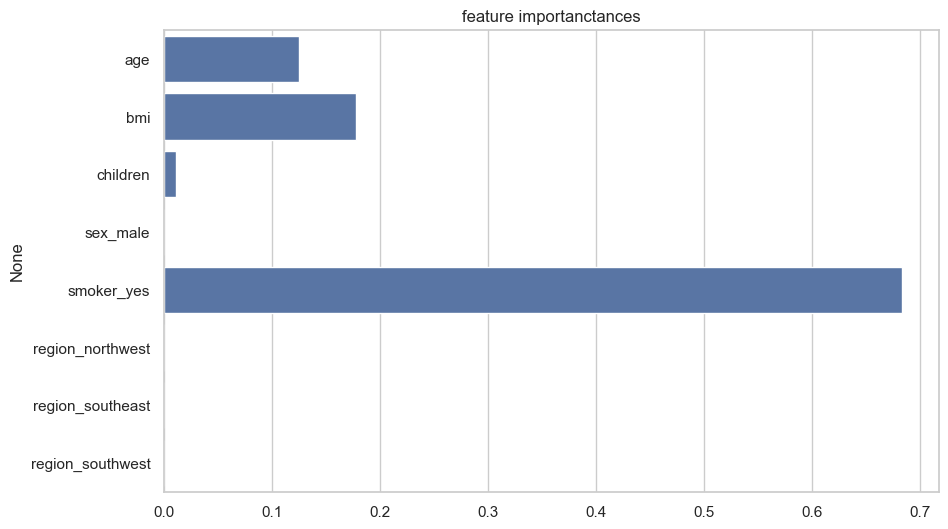

In [16]:
importances= best_rf.feature_importances_
features=x.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances,y=features)
plt.title("feature importanctances")
plt.show()


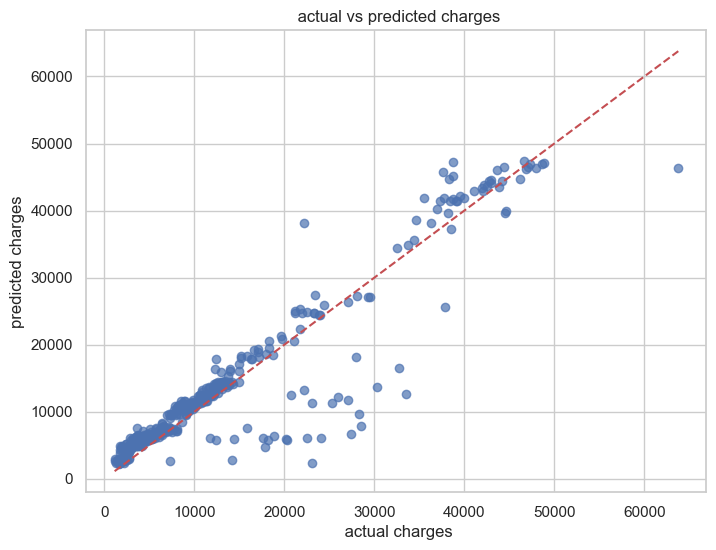

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_best,alpha=0.7)
plt.xlabel(" actual charges")
plt.ylabel("predicted charges")
plt.title(" actual vs predicted charges")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

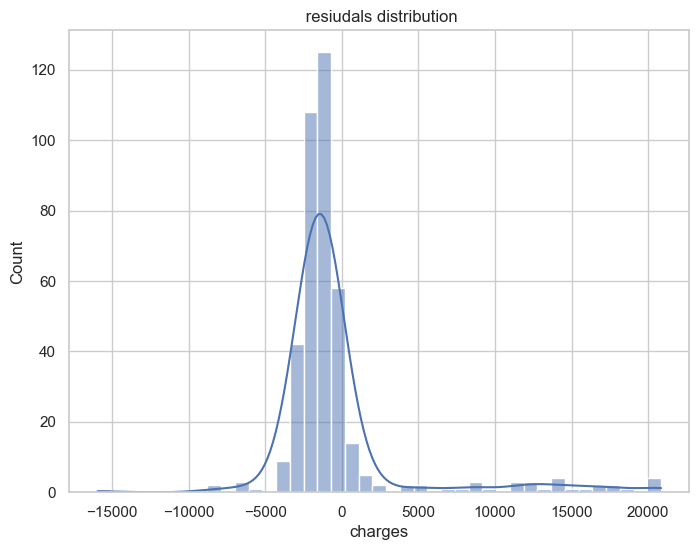

In [18]:
resiudals=y_test-y_pred_best
plt.figure(figsize=(8,6))
sns.histplot(resiudals,kde=True)
plt.title(" resiudals distribution")
plt.show()

In [19]:
import joblib
joblib.dump(best_rf,'Medical_insurance1.pkl')

['Medical_insurance1.pkl']